In [2]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
print(pd.__version__)

1.4.4


## Abrir los pickles obtenidos con las siguientes columnas
### Main index - Hace referencia al índice del ejemplo de ese corpus TEST
### Text - Hace referencia a los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### Hipótesis - Hace referencia a los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### R_Text - Hace referencia a los embeddings de los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### R_Hip - Hace referencia a los embeddings de los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### M_Align - Hace referencia a la matriz de alineamiento de los tokens del Texto y de la Hipótesis 
### Prediction - Hace referencia a la predicción del modelo para ese ejemplo
### Gol_label - Etiqueta correcta del ejemplo
### Idx - Número de ejemplo, el primero es el real y los deḿas son con la hipótesis parafraseada

In [4]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [5]:
carpeta="data/base_training_QQP_salida/"

In [6]:
a=glob.glob(carpeta+'p*.pickle')
a[0]

'data/base_training_QQP_salida\\pTEST_new_0.05_0.csv.pickle'

In [7]:
dasdas =pd.read_pickle(a[0])
dasdas

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,ADJ}, times{time,NOUN}, square{squa...","[NULL{null,ADJ}, times{time,NOUN}, square{squa...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.14889279, 0.104384616, 0.0161...","[0.7330875, 0.26503438, 0.001878084]","[0.0, 1.0, 0.0]",0,1446,entailment,neutral
1,1,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, couple{couple,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17860392, 0.1662...","[0.839204, 0.15999468, 0.0008013443]","[0.0, 1.0, 0.0]",0,2160,entailment,neutral
2,2,"[NULL{null,PROPN}, a{a,DET}, tan{tan,NOUN}, -{...","[NULL{null,ADJ}, a{a,DET}, man{man,NOUN}, sitt...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.12952...","[0.9210948, 0.0663313, 0.012574027]","[1.0, 0.0, 0.0]",0,4171,entailment,entailment
3,3,"[NULL{null,PROPN}, a{a,DET}, sign{sign,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, giant{giant,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17921524, 0.1633...","[0.63405293, 0.32265246, 0.04329467]","[0.0, 1.0, 0.0]",0,5885,entailment,neutral
4,4,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1707767, 0.01616...","[0.9157257, 0.08173129, 0.0025429872]","[1.0, 0.0, 0.0]",0,1252,entailment,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...
597,597,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wa...","[NULL{null,ADJ}, almost{almost,ADV}, had{have,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.23029745, 0.09098914, 0.02092...","[0.008494461, 0.9910766, 0.0004290199]","[0.0, 1.0, 0.0]",1,9681,neutral,neutral
598,598,"[NULL{null,PROPN}, the{the,DET}, football{foot...","[NULL{null,PROPN}, what{what,NOUN}, are{be,VER...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13200963, 0.011193112, 0.0606...","[0.065547444, 0.22682504, 0.70762753]","[0.0, 0.0, 1.0]",1,9694,contradiction,contradiction
599,599,"[NULL{null,PROPN}, the{the,DET}, football{foot...","[NULL{null,PROPN}, a{a,DET}, red{red,ADJ}, pla...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.06875465, 0.1684...","[0.003225121, 0.9687075, 0.0280674]","[0.0, 1.0, 0.0]",1,9695,neutral,neutral
600,600,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,INTJ}, what{what,NOUN}, if{if,ADP},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13200963, 0.24369477, 0.08687...","[0.772184, 0.20669158, 0.021124437]","[1.0, 0.0, 0.0]",1,9697,entailment,entailment


In [8]:
def entropia_f(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    probs = [np.mean(X == valor) for valor in set(X)]
    return round(np.sum(-p * np.log2(p) for p in probs), 3)

In [9]:
stats.zscore([[1,2,3,4],[4,3,2,1]])

array([[-1., -1.,  1.,  1.],
       [ 1.,  1., -1., -1.]])

# Procesamiento de todos los resultados para calcular la entropia de los alineamientos

In [10]:
new_data = {'Docs' : [], 'grupo': [],'muestreo': [], 'Total' : [], 'Subtotal' : [], 'E_P' : [], 'entropia' : [], 'Paraphrase' : []}
etiquetas=['entailment','neutral','contradiction']
for e in a:
    df=pd.read_pickle(e)
    valores=[0,1]
    for i in valores:
        df_prediction=df[df["Paraphrase"]==i]
        for l1 in etiquetas:
            for l2 in etiquetas:
                new_data['Docs'].append(e)
                new_data['grupo'].append(float(e.split('_')[5])*100)
                new_data['muestreo'].append(e.split('_')[6])    
                subtotal=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].shape[0]
                total=df_prediction[df_prediction['gold_label']==l1].shape[0]
                new_data['Total'].append(total)
                new_data['Subtotal'].append(subtotal)
                new_data['E_P'].append(l1+"_"+l2)
                temp=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].copy()
                l_entropia=[]
                for index,strings in temp.iterrows():
                    t=strings[1]
                    h=strings[2]
                    matriz=strings[5]
                    matriz_c=matriz[1:len(t)-1,1:len(h)-1]
                    l_entropia.append(entropia_f(stats.zscore(matriz_c.T).flatten()))
                new_data['entropia'].append(np.array(l_entropia[:]))
                new_data['Paraphrase'].append(i)
                l_entropia.clear()
dfn=pd.DataFrame(new_data)

C:\Users\Ninja\AppData\Local\Temp\ipykernel_11232\521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
C:\Users\Ninja\AppData\Local\Temp\ipykernel_11232\521637173.py:4: RuntimeWarning: divide by zero encountered in log2
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
C:\Users\Ninja\AppData\Local\Temp\ipykernel_11232\521637173.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
C:\Users\Ninja\AppData\Local\Temp\ipykernel_11232\521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
C:\Users\Ninja\AppData\Local\Temp\i

In [11]:
dfn.to_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [12]:
dfn=pd.read_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [13]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,entropia,Paraphrase
0,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,109,97,entailment_entailment,"[7.192, 5.374, 7.254, 7.029, 7.399, 5.492, 6.7...",0
1,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,109,8,entailment_neutral,"[7.186, 5.2, 8.15, 5.557, 5.322, 5.533, 7.237,...",0
2,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,109,4,entailment_contradiction,"[5.947, 5.098, 5.755, 6.509]",0
3,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,104,16,neutral_entailment,"[4.322, 6.27, 6.622, 5.622, 7.664, 6.354, 6.60...",0
4,data/base_training_QQP_salida\pTEST_new_0.05_0...,5.0,0.csv.pickle,104,80,neutral_neutral,"[5.755, 6.692, 5.322, 7.337, 6.986, 6.682, 5.3...",0
...,...,...,...,...,...,...,...,...
2173,data/base_training_QQP_salida\pTEST_new_1_0.cs...,100.0,0.csv.pickle,2042,1574,neutral_neutral,"[5.053, 6.418, 7.233, 4.725, 5.596, 7.225, 6.0...",1
2174,data/base_training_QQP_salida\pTEST_new_1_0.cs...,100.0,0.csv.pickle,2042,258,neutral_contradiction,"[6.533, 6.828, 5.522, 4.91, 6.27, 7.386, 6.6, ...",1
2175,data/base_training_QQP_salida\pTEST_new_1_0.cs...,100.0,0.csv.pickle,2023,116,contradiction_entailment,"[6.374, 5.492, 7.021, 6.501, 6.895, 4.56, 6.35...",1
2176,data/base_training_QQP_salida\pTEST_new_1_0.cs...,100.0,0.csv.pickle,2023,261,contradiction_neutral,"[7.462, 6.742, 5.167, 7.14, 6.17, 6.808, 8.055...",1


In [14]:
len(dfn['grupo'].unique())

7

In [15]:
dfn['entropia'][0]

array([7.192, 5.374, 7.254, 7.029, 7.399, 5.492, 6.728, 4.807, 7.246,
       5.989, 5.821, 5.861, 7.399, 5.107, 5.098, 5.272, 6.13 , 6.177,
       5.322, 6.492, 5.529, 4.807, 6.085, 5.392, 6.228, 6.943, 7.071,
       5.122, 4.392, 4.927, 4.642, 5.762, 6.427, 5.737, 4.75 , 5.107,
       5.781, 5.869, 5.869, 6.555, 5.998, 6.985, 7.789, 5.107, 5.774,
       5.244, 6.795, 6.175, 5.122, 5.17 , 4.863, 6.46 , 6.129, 7.145,
       6.839, 5.844, 6.129, 6.71 , 5.67 , 7.771, 5.75 , 5.672, 5.5  ,
       5.585, 7.337, 5.978, 6.495, 6.901, 6.464, 6.472, 5.6  , 5.345,
       6.702, 3.837, 6.965, 6.34 , 6.068, 6.448, 7.269, 6.392, 6.103,
       5.907,   nan, 6.807, 5.73 , 5.418, 7.638, 6.249, 5.939, 7.009,
       5.25 , 5.607, 6.129, 6.892, 5.707, 5.578, 6.354])

In [16]:
etiquetas

['entailment', 'neutral', 'contradiction']

In [17]:
labels=[]
for e1 in etiquetas:
    for e2 in etiquetas:
        labels.append(e1+"_"+e2)
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

In [18]:
valores_labels=[]
for el in labels:
    a=dfn[(dfn['E_P']==el) & (dfn['Paraphrase']==0)]
    b=a['entropia'].values[0]
    valores_labels.append(b)
valores_labels

[array([7.192, 5.374, 7.254, 7.029, 7.399, 5.492, 6.728, 4.807, 7.246,
        5.989, 5.821, 5.861, 7.399, 5.107, 5.098, 5.272, 6.13 , 6.177,
        5.322, 6.492, 5.529, 4.807, 6.085, 5.392, 6.228, 6.943, 7.071,
        5.122, 4.392, 4.927, 4.642, 5.762, 6.427, 5.737, 4.75 , 5.107,
        5.781, 5.869, 5.869, 6.555, 5.998, 6.985, 7.789, 5.107, 5.774,
        5.244, 6.795, 6.175, 5.122, 5.17 , 4.863, 6.46 , 6.129, 7.145,
        6.839, 5.844, 6.129, 6.71 , 5.67 , 7.771, 5.75 , 5.672, 5.5  ,
        5.585, 7.337, 5.978, 6.495, 6.901, 6.464, 6.472, 5.6  , 5.345,
        6.702, 3.837, 6.965, 6.34 , 6.068, 6.448, 7.269, 6.392, 6.103,
        5.907,   nan, 6.807, 5.73 , 5.418, 7.638, 6.249, 5.939, 7.009,
        5.25 , 5.607, 6.129, 6.892, 5.707, 5.578, 6.354]),
 array([7.186, 5.2  , 8.15 , 5.557, 5.322, 5.533, 7.237, 6.34 ]),
 array([5.947, 5.098, 5.755, 6.509]),
 array([4.322, 6.27 , 6.622, 5.622, 7.664, 6.354, 6.609, 6.714, 6.344,
        6.998, 6.945, 7.044, 6.952, 6.07 , 5.707, 6.932]

In [19]:
len(valores_labels)

9

([<matplotlib.axis.XTick at 0x1c150e049a0>,
 [Text(0, 0, 'entailment_entailment'),
  Text(1, 0, 'entailment_neutral'),
  Text(2, 0, 'entailment_contradiction'),
  Text(3, 0, 'neutral_entailment'),
  Text(4, 0, 'neutral_neutral'),
  Text(5, 0, 'neutral_contradiction'),
  Text(6, 0, 'contradiction_entailment'),
  Text(7, 0, 'contradiction_neutral'),
  Text(8, 0, 'contradiction_contradiction')])

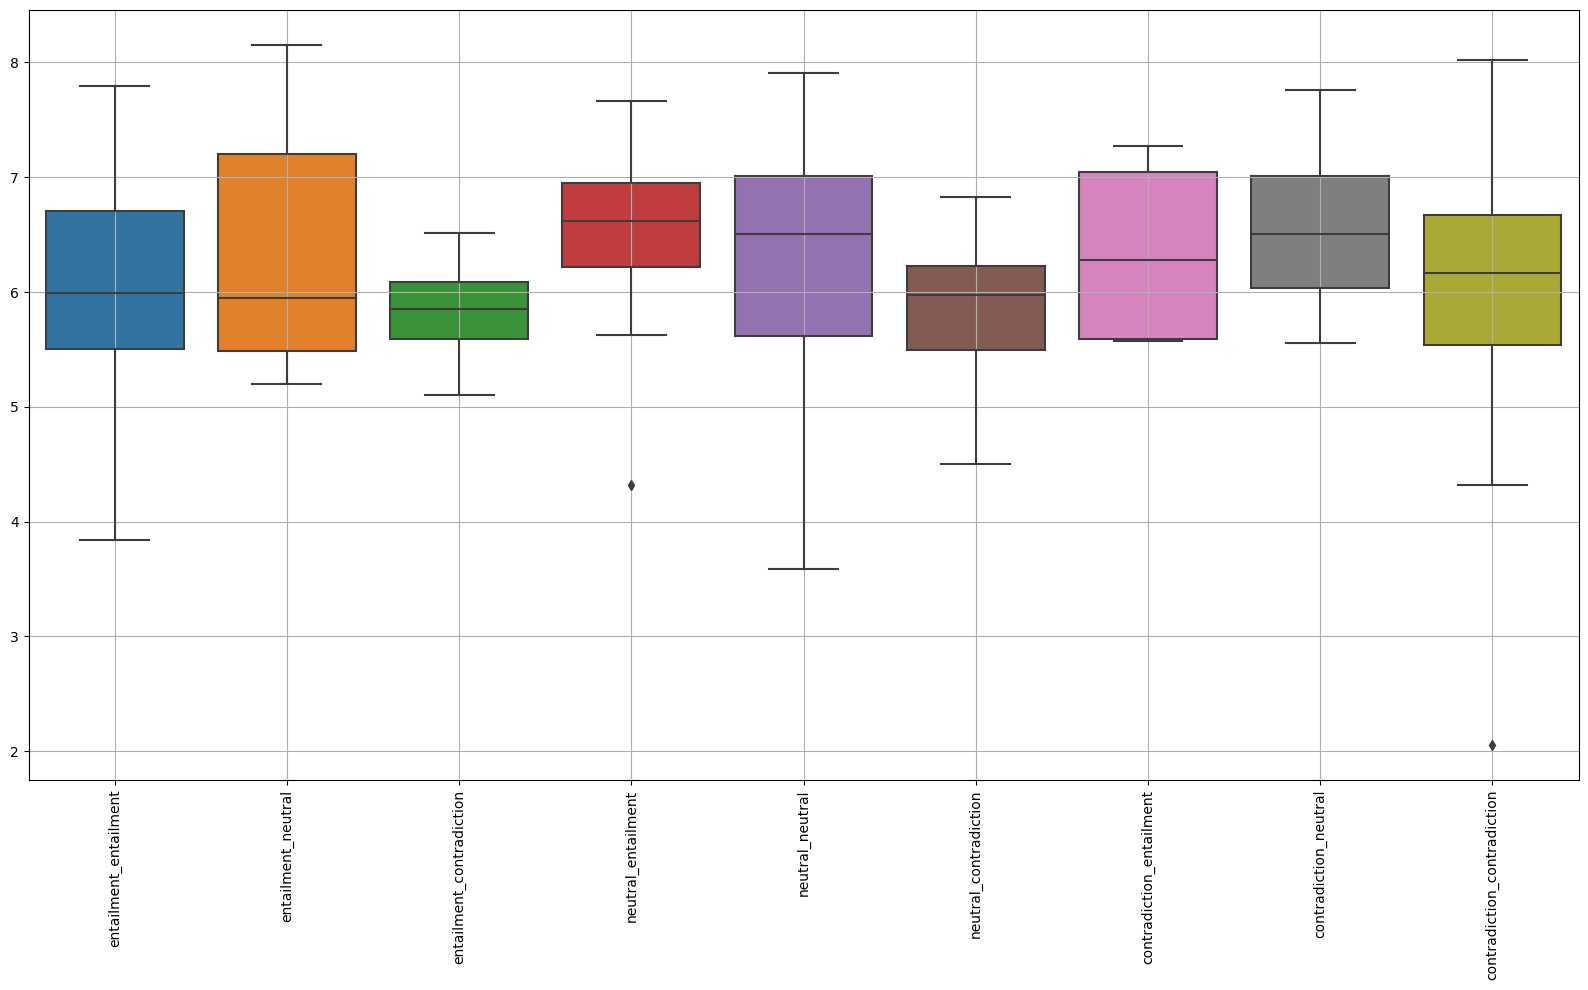

In [20]:
fig2 = plt.figure(figsize=(20,10))
sns.boxplot(data=valores_labels)
plt.grid()
plt.xticks(range(9),labels,rotation=90)

# Procesamiento para generar boxplot por muestreos

In [21]:
l_grupos=dfn.grupo.unique()
labels_g=[]
datos_g=[]
grupo_g=[]
for lg in l_grupos:
    for lab in labels:
        l_mean_entropia=[]
        temp=dfn[(dfn['grupo']==lg) & (dfn['E_P']==lab) & (dfn['Paraphrase']==0)]
        for index,strings in temp.iterrows():
            l_mean_entropia.append(np.nanmean(strings['entropia']))
        labels_g.append(lab)
        datos_g.append(l_mean_entropia[:])
        l_mean_entropia.clear()
        grupo_g.append(lg)

C:\Users\Ninja\AppData\Local\Temp\ipykernel_11232\654303805.py:10: RuntimeWarning: Mean of empty slice
  l_mean_entropia.append(np.nanmean(strings['entropia']))


In [22]:
len(grupo_g)

63

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

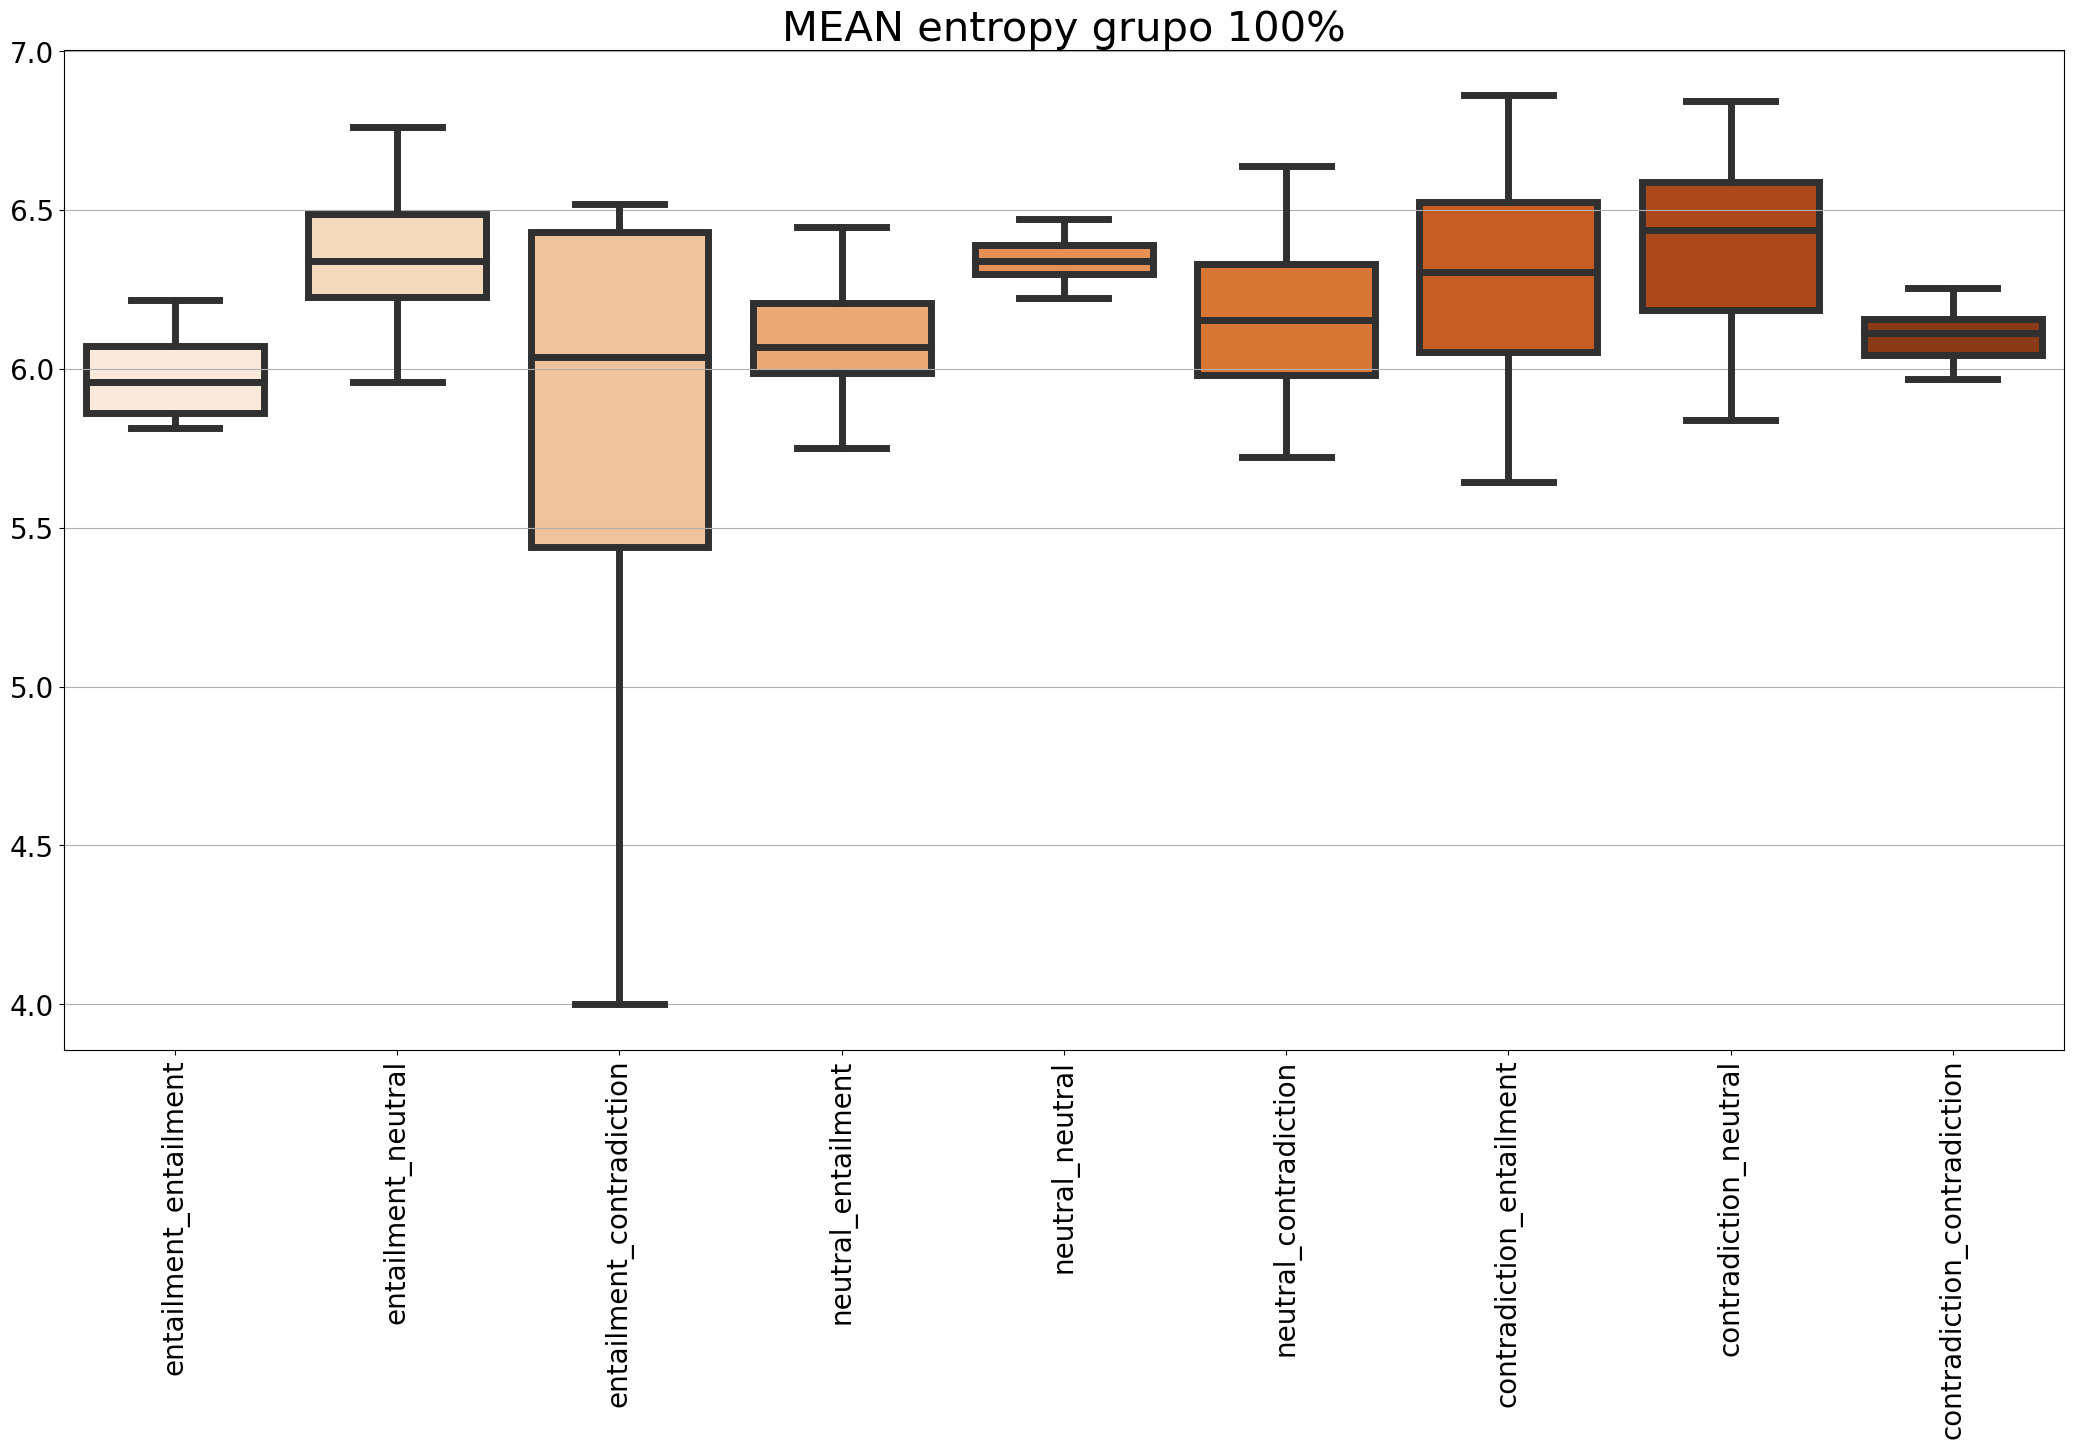

In [23]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 100%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[:9],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[:9],fontsize=20,rotation=90)


[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

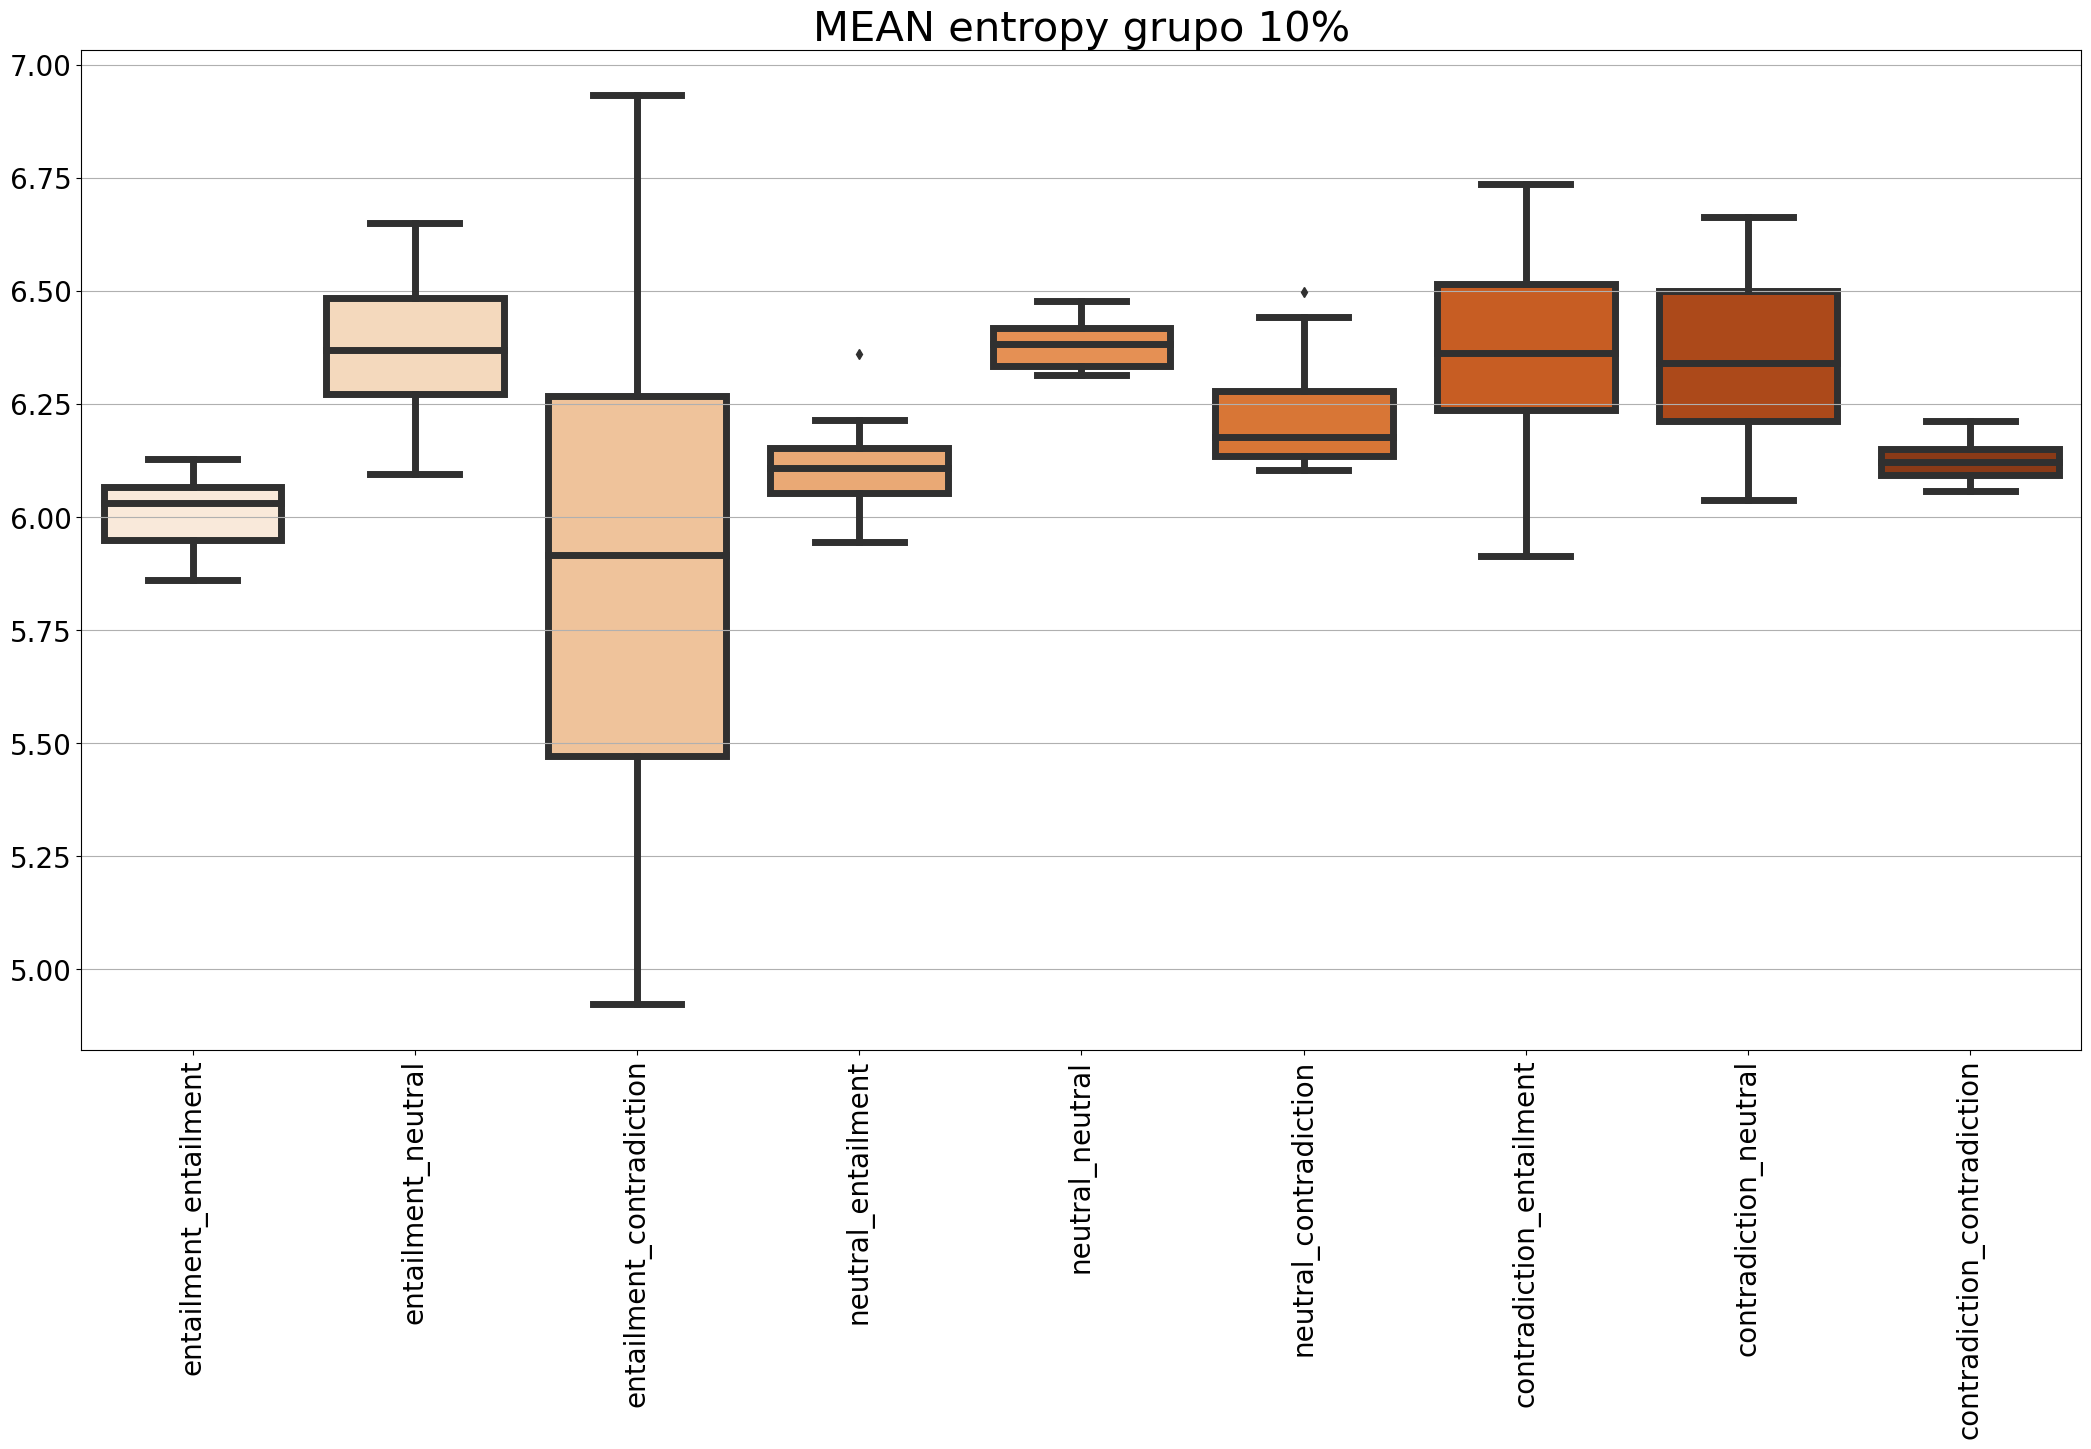

In [24]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 10%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[9:18],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[9:18],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

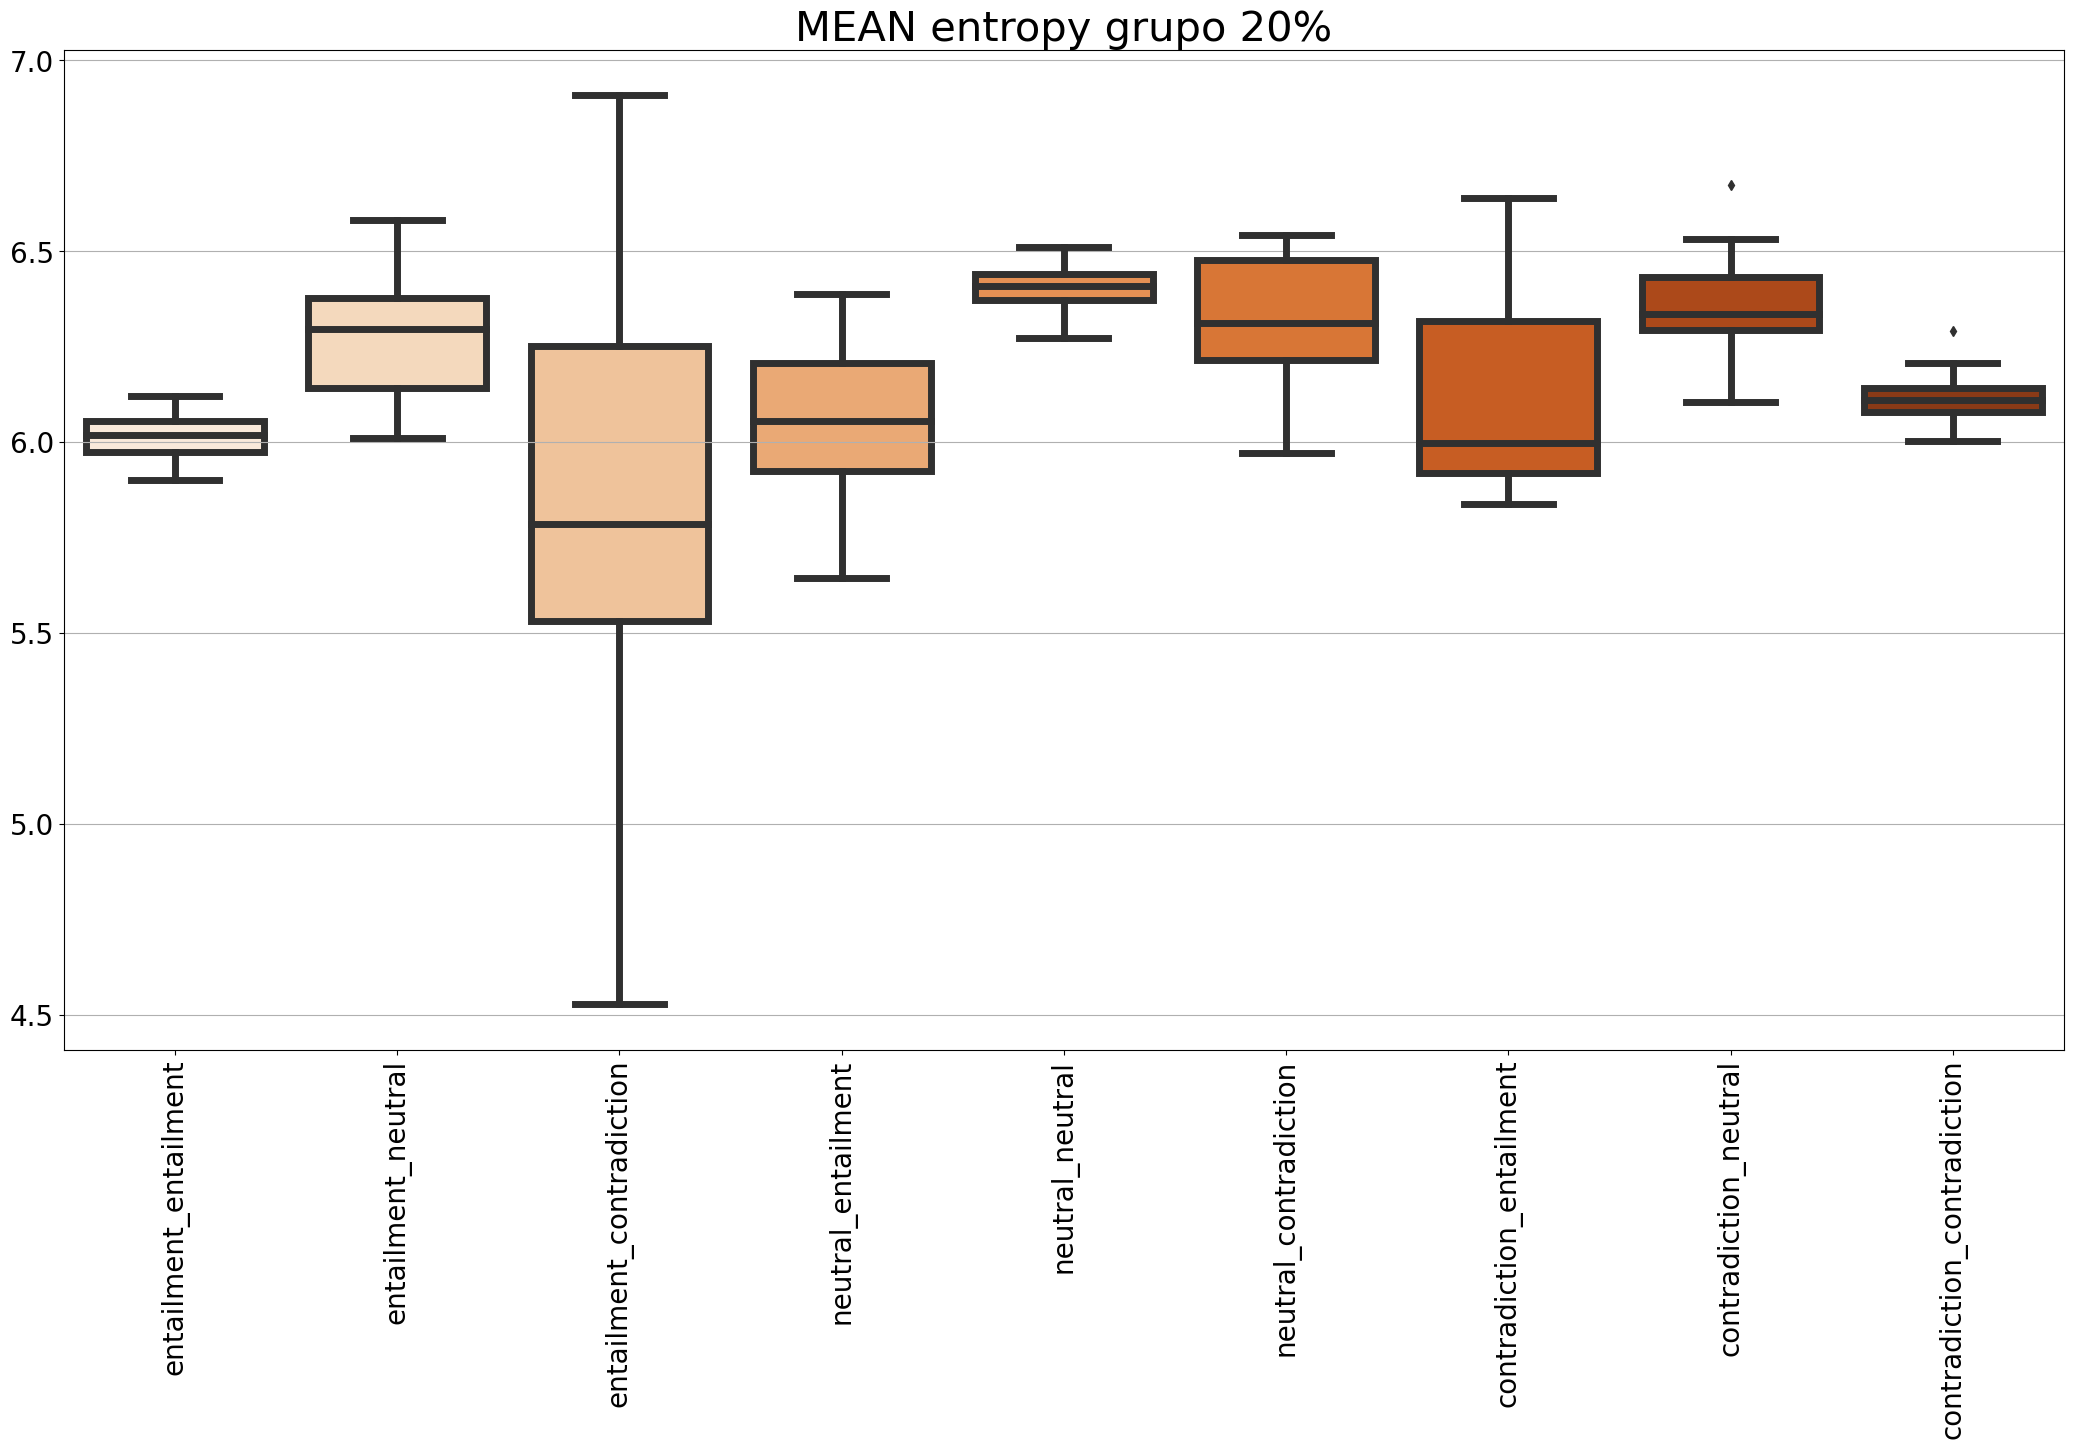

In [25]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 20%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[18:27],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[18:27],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

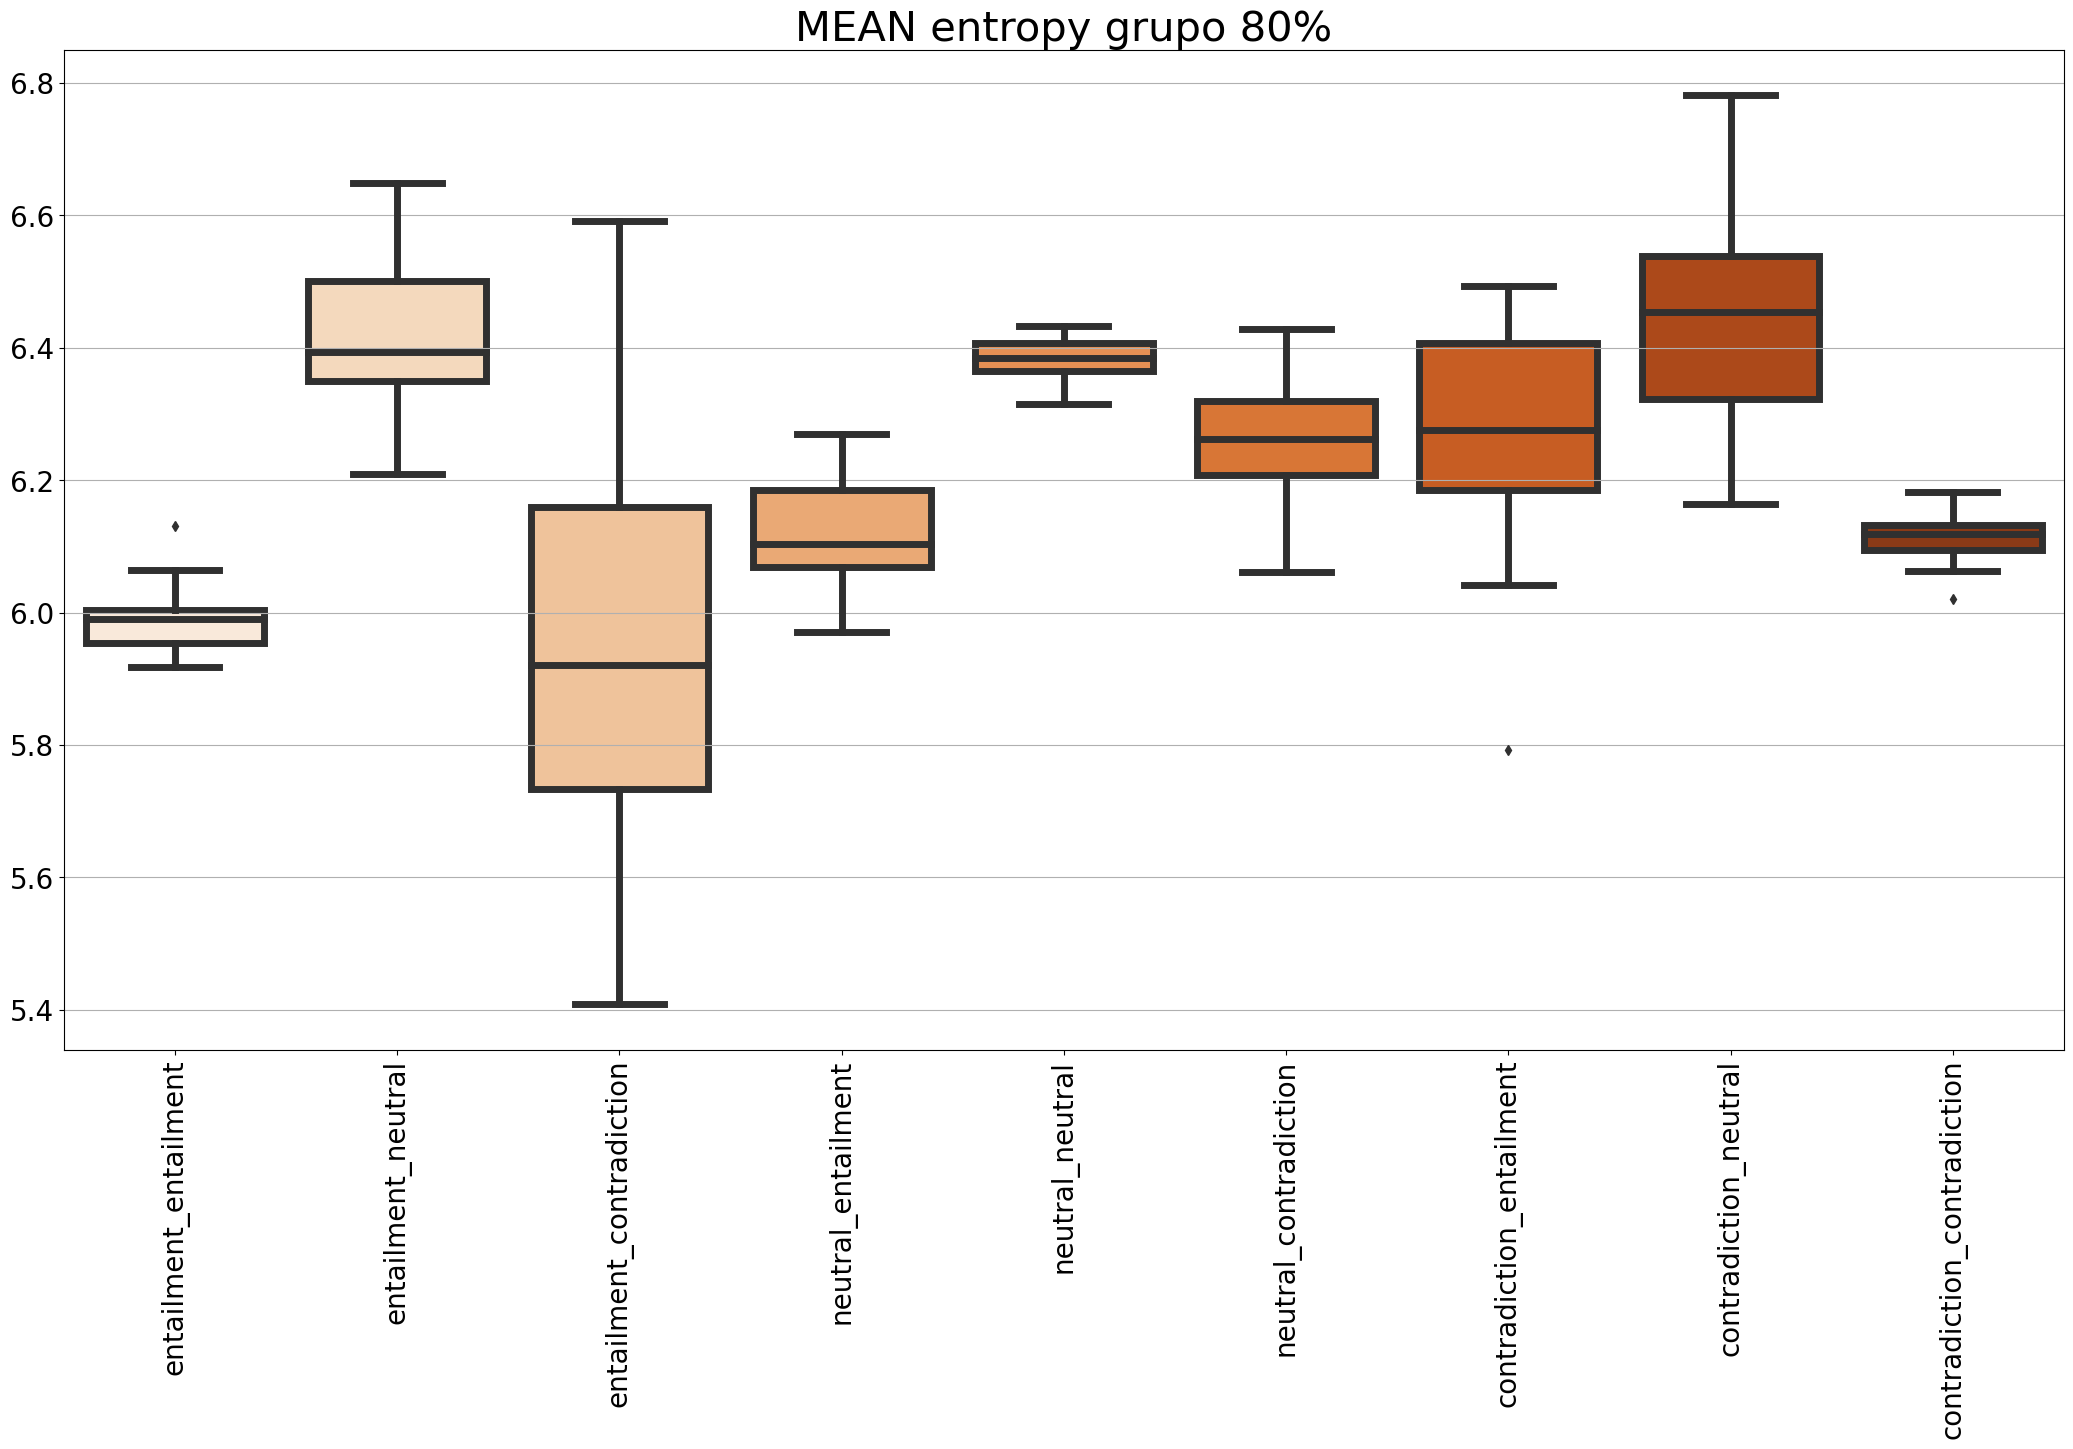

In [26]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 80%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[27:36],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[27:36],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

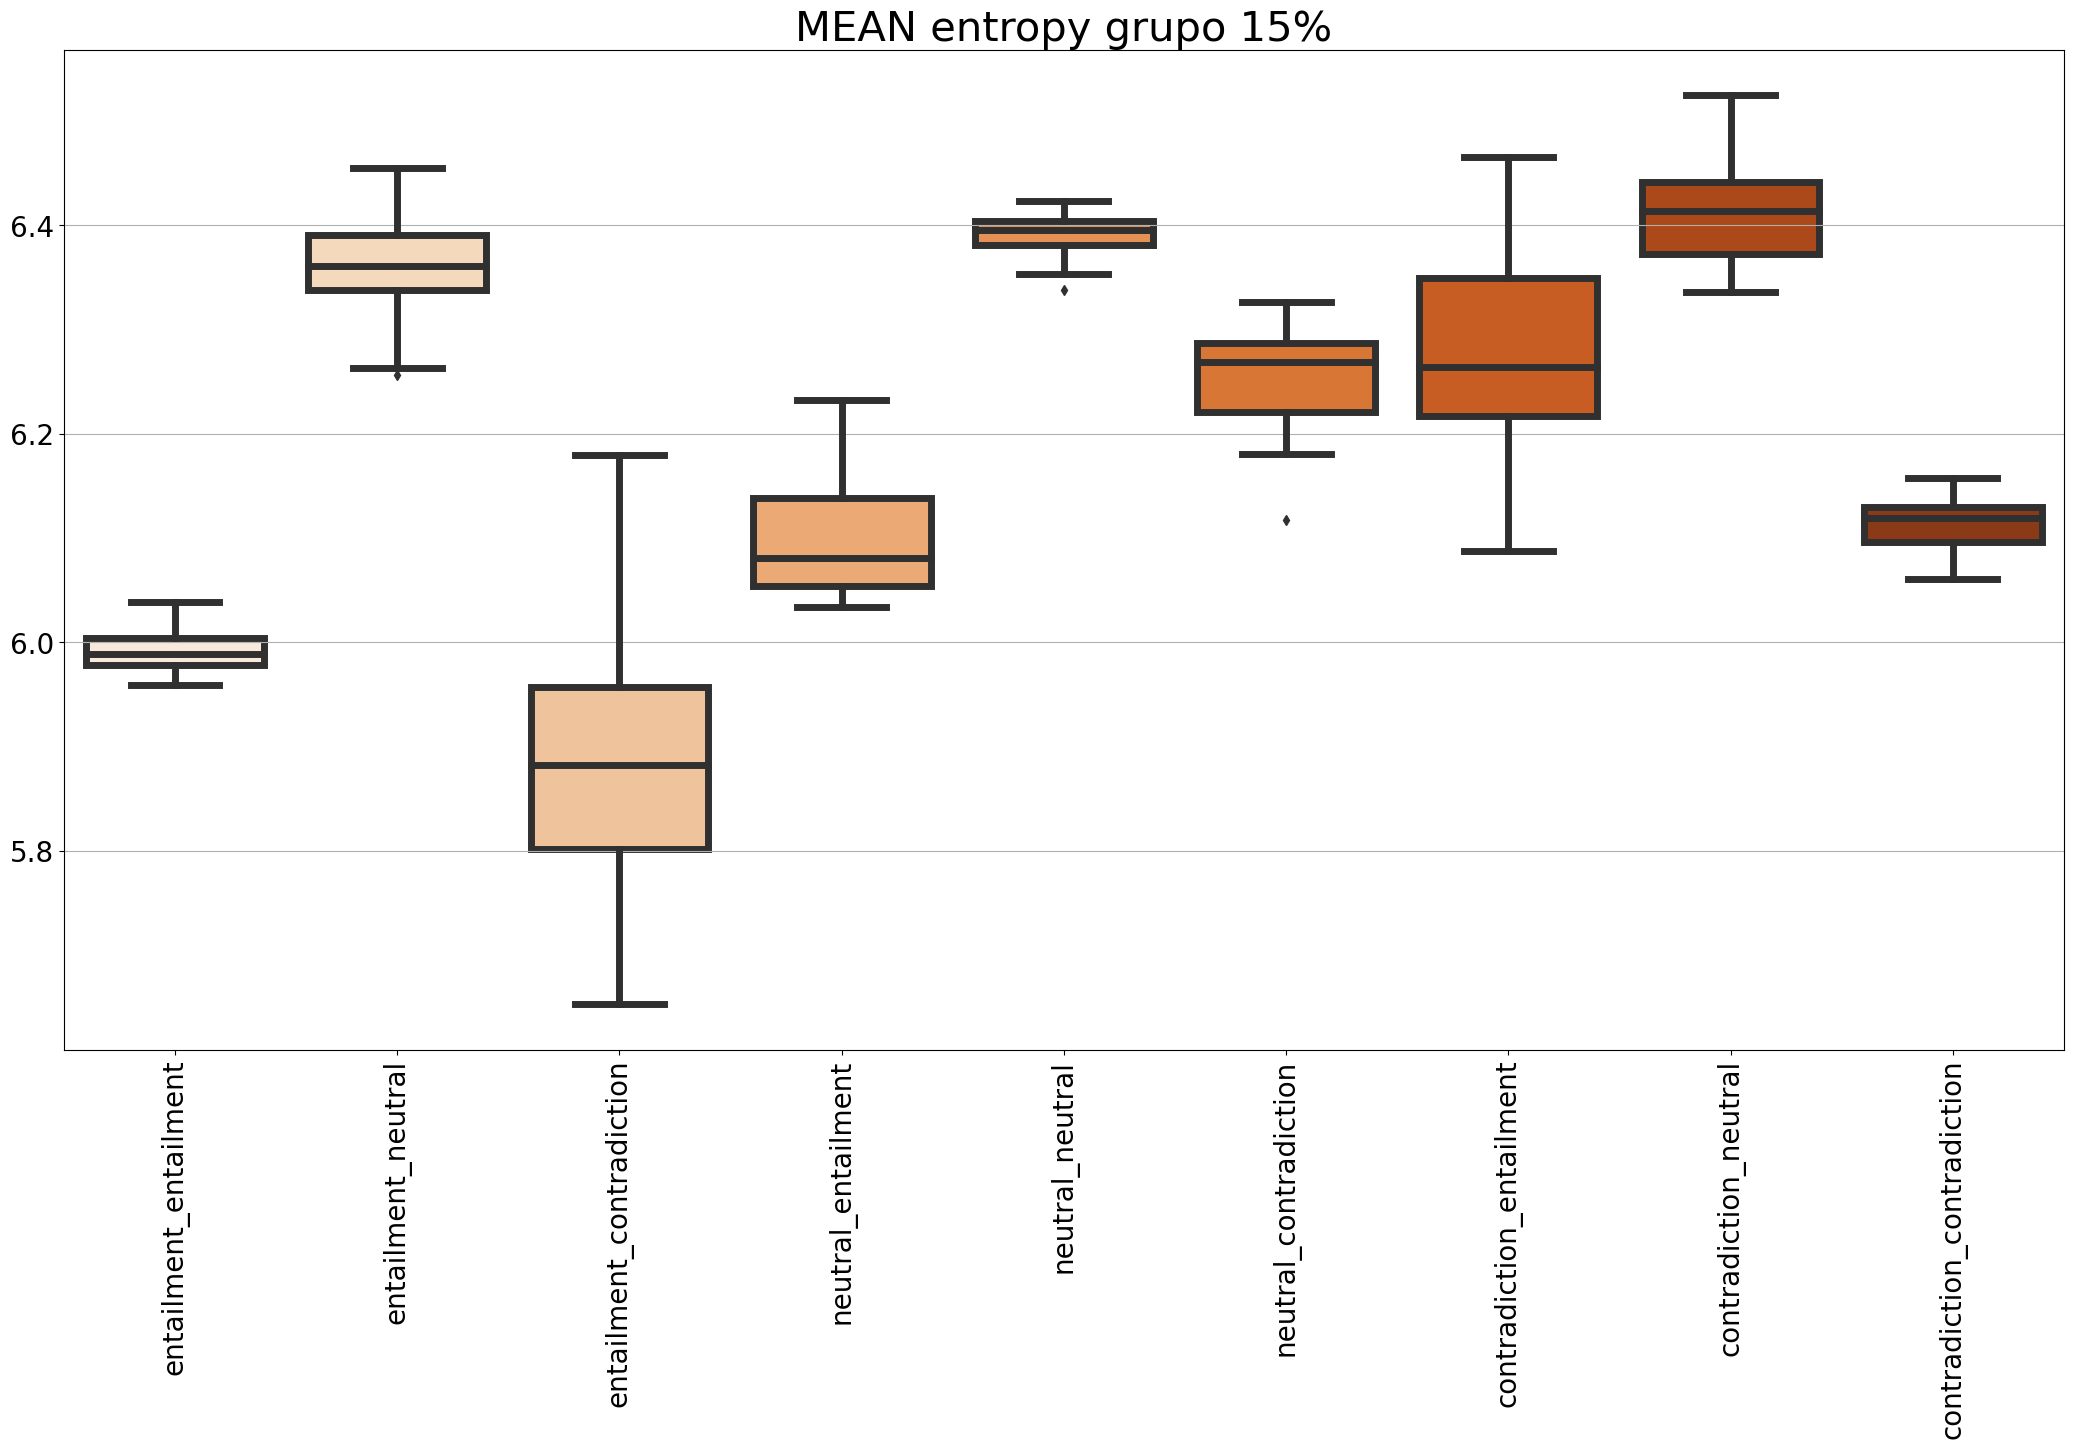

In [27]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 15%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[36:45],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[36:45],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

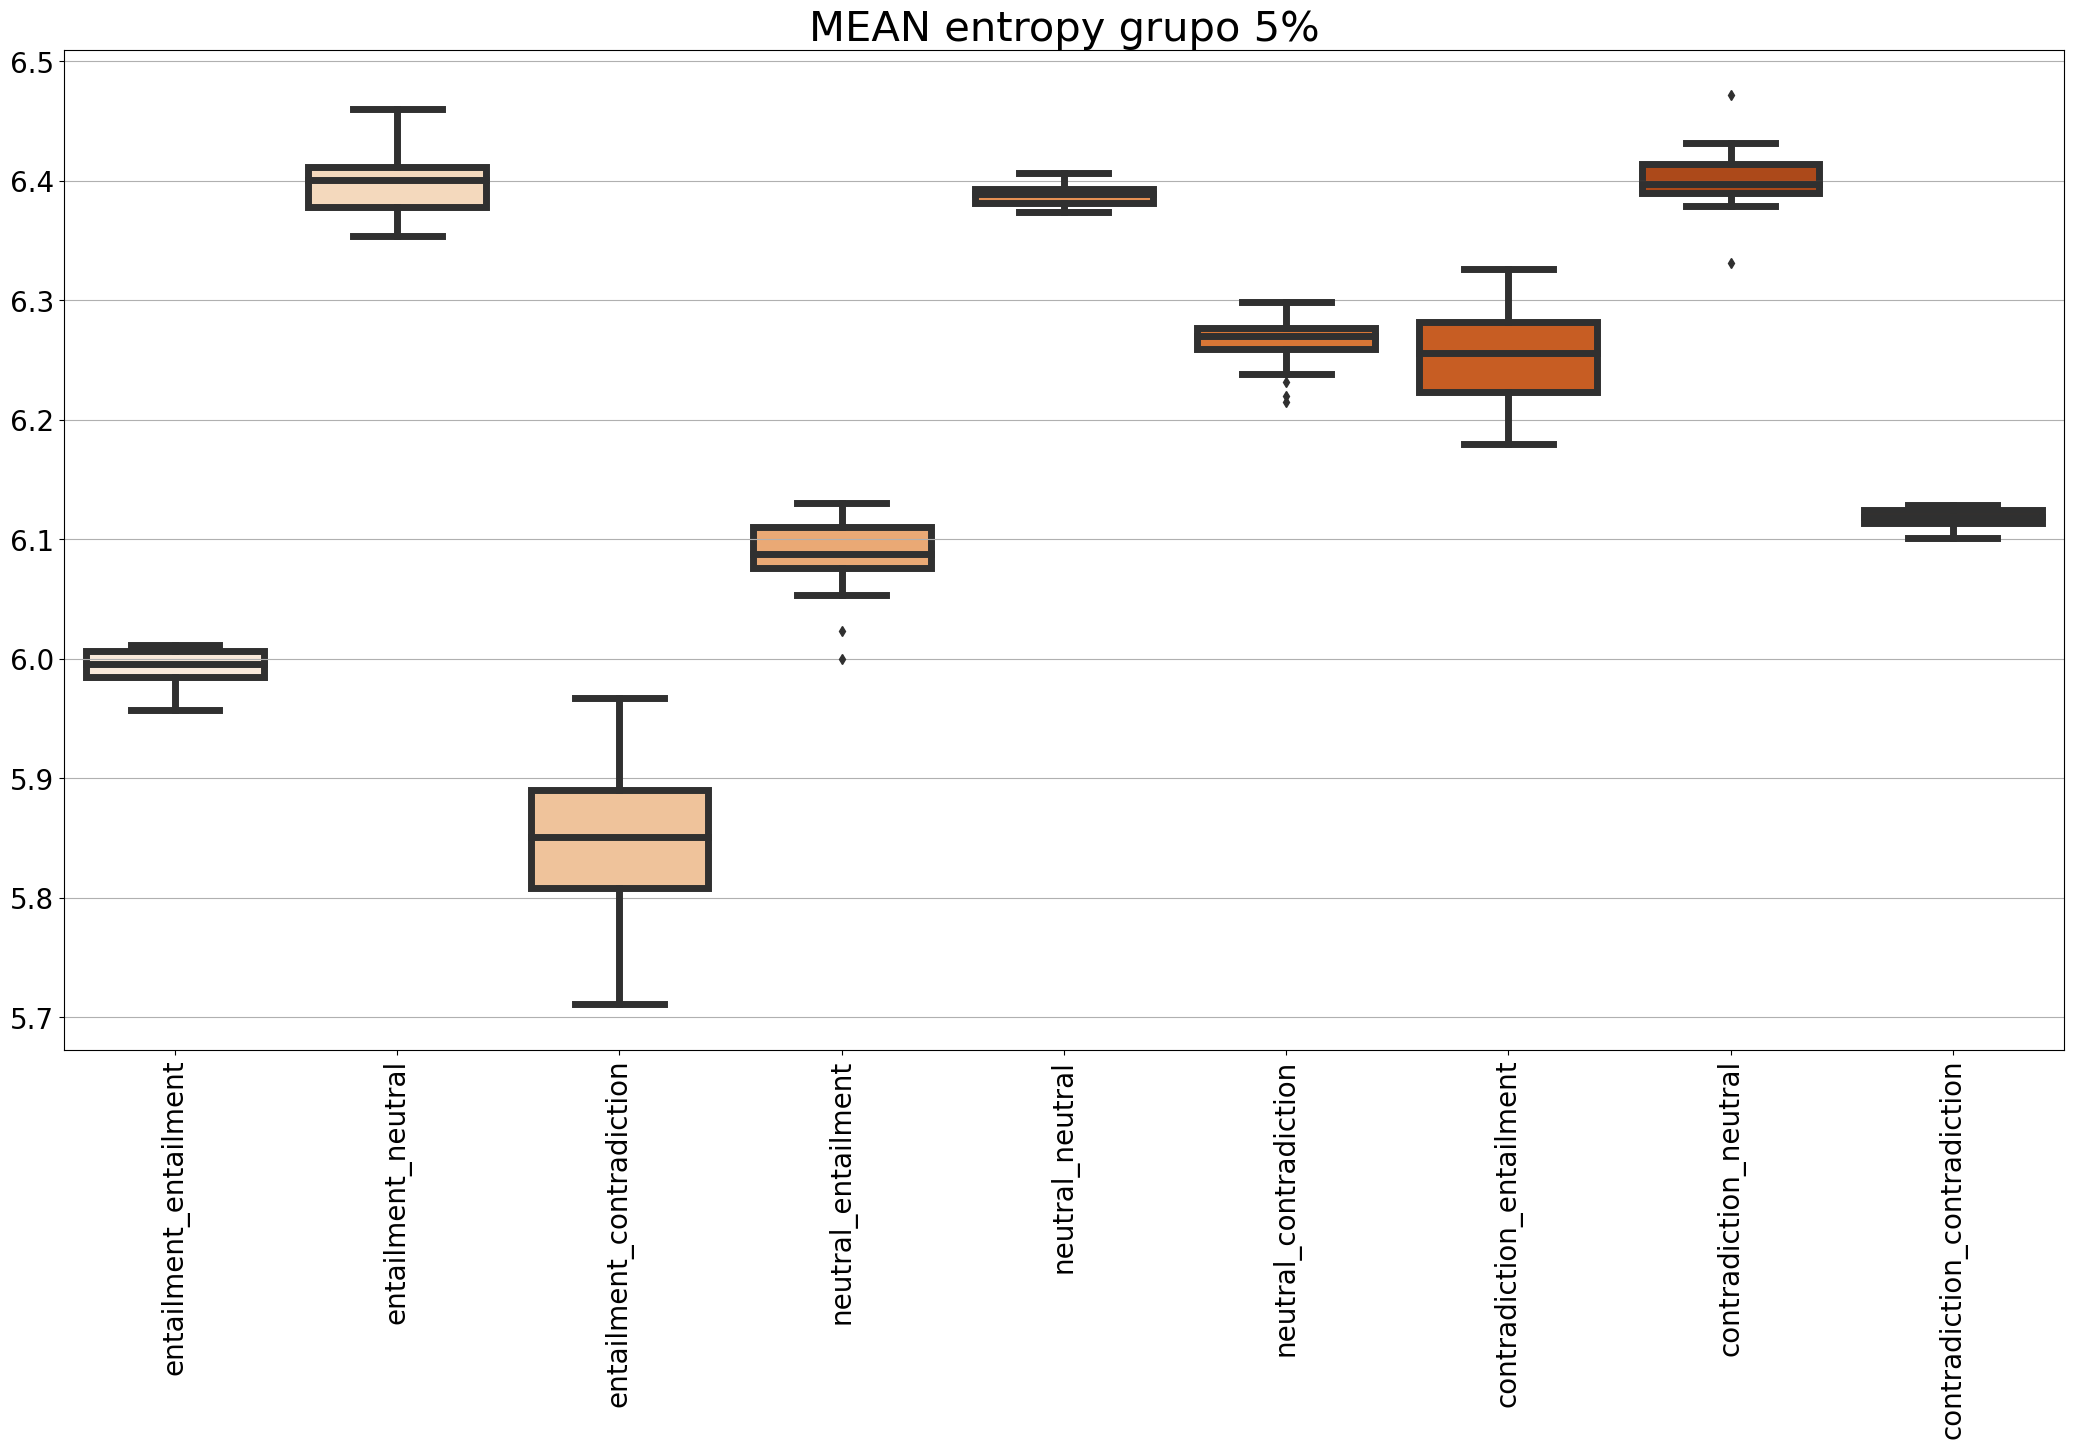

In [28]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 5%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[45:54],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[45:54],fontsize=20,rotation=90)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

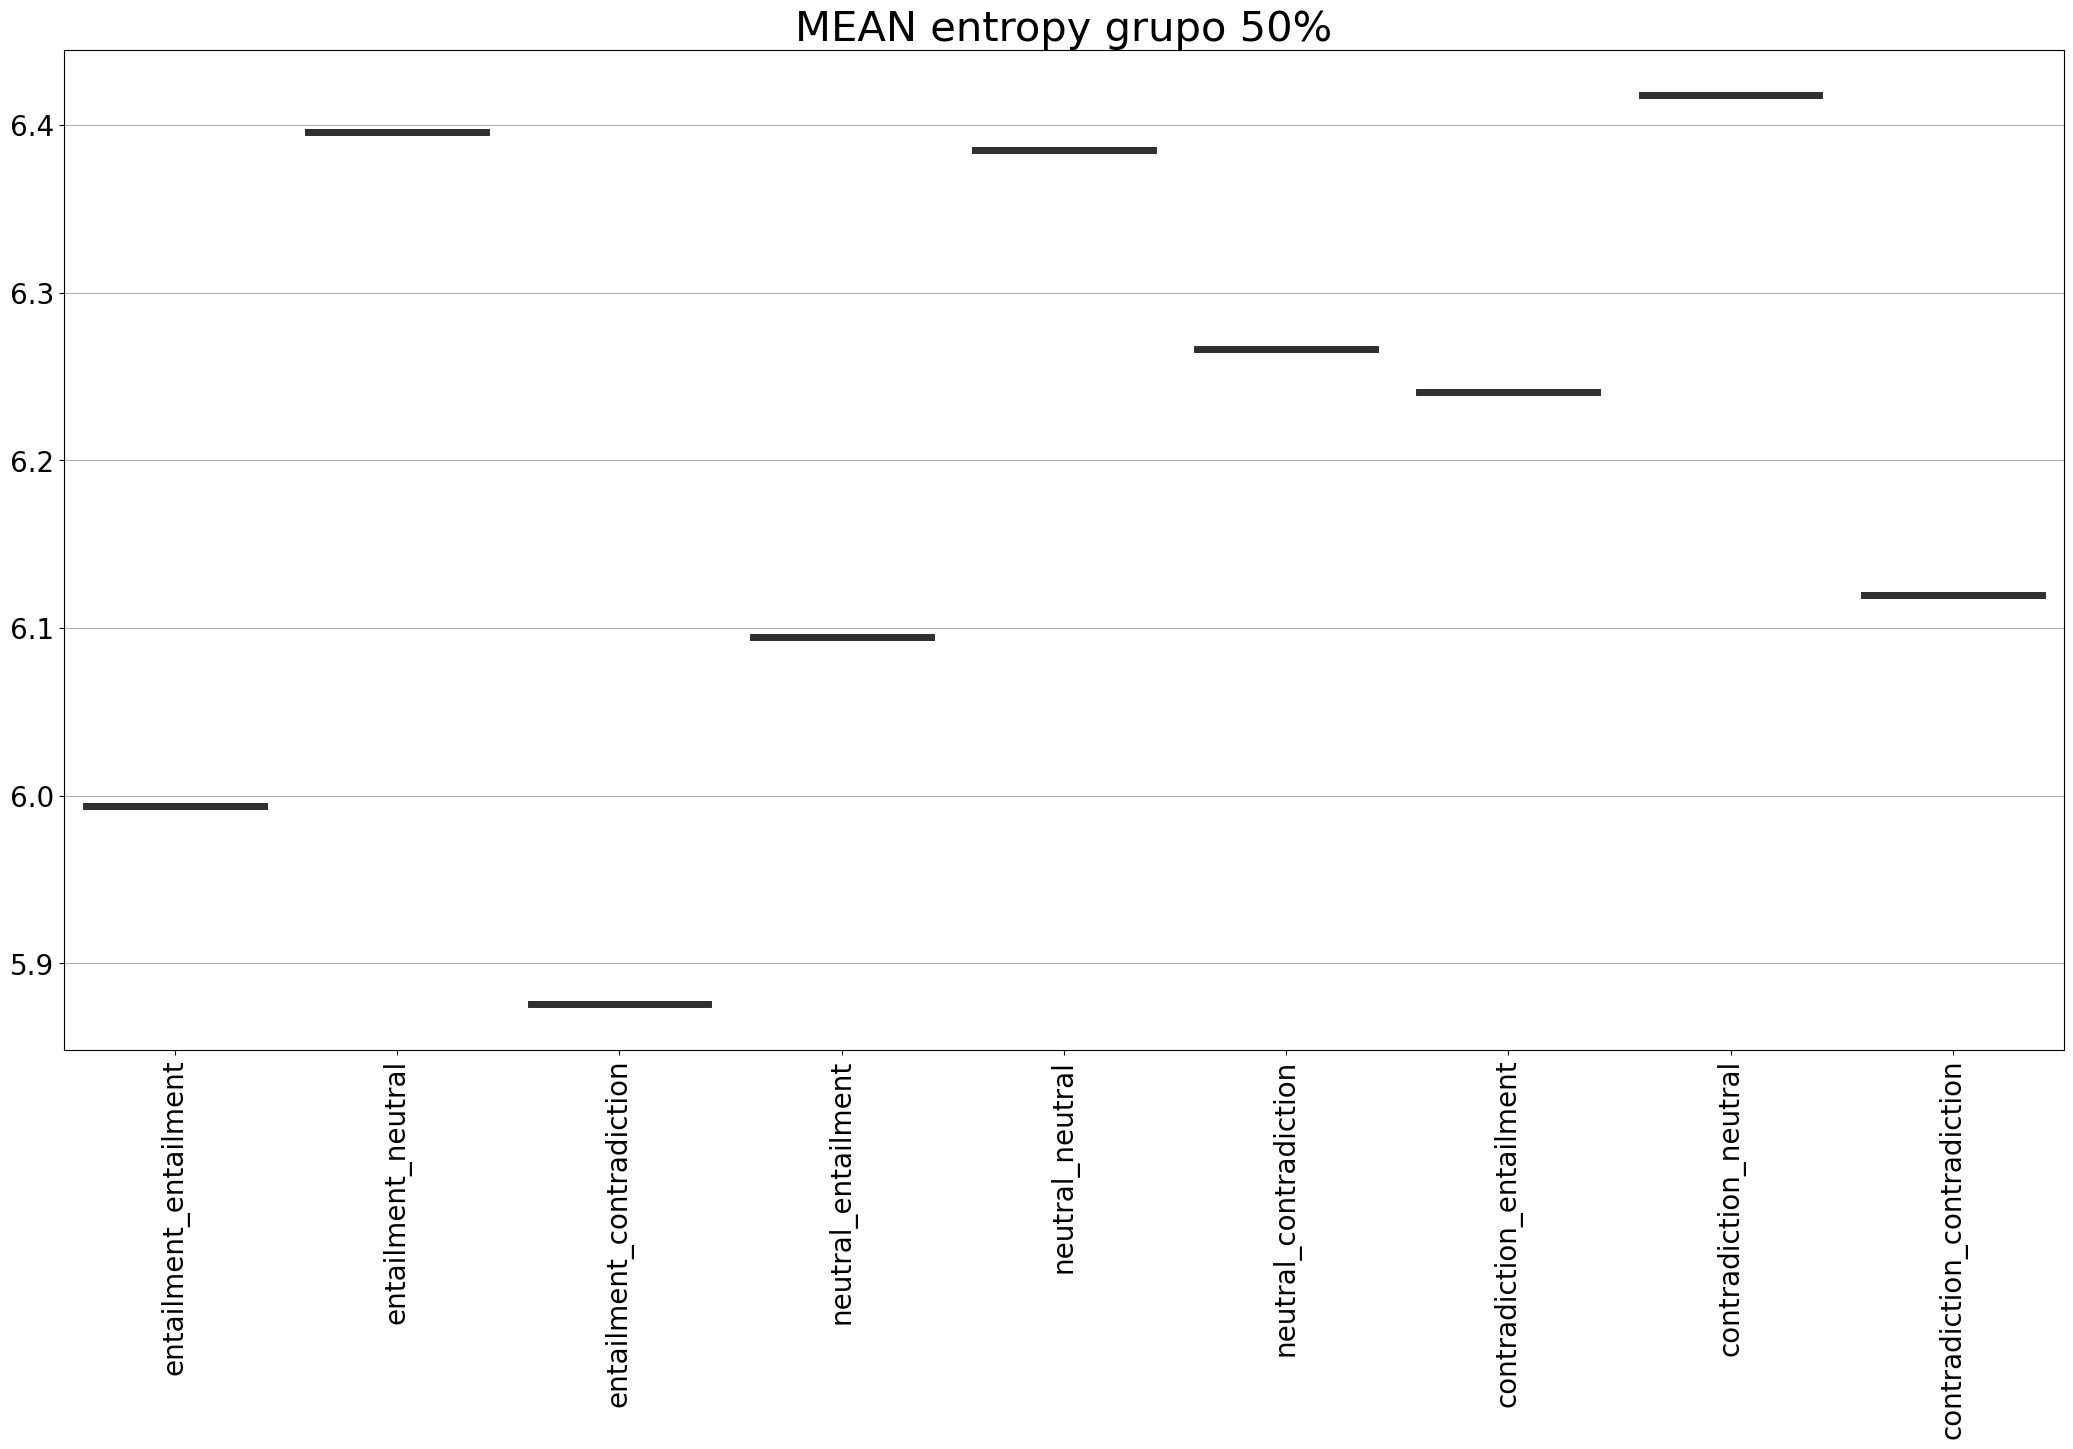

In [29]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo 50%",fontsize=30)
bp0 = sns.boxplot(data=datos_g[54:63],linewidth=5,palette="Oranges")
ax.set_xticklabels(labels_g[54:63],fontsize=20,rotation=90)

# Matriz de alineamiento

In [30]:
a=glob.glob(carpeta+'p*.pickle')
a[0]

'data/base_training_QQP_salida\\pTEST_new_0.05_0.csv.pickle'

In [31]:
df=pd.read_pickle(a[0])
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,ADJ}, times{time,NOUN}, square{squa...","[NULL{null,ADJ}, times{time,NOUN}, square{squa...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.14889279, 0.104384616, 0.0161...","[0.7330875, 0.26503438, 0.001878084]","[0.0, 1.0, 0.0]",0,1446,entailment,neutral
1,1,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, couple{couple,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17860392, 0.1662...","[0.839204, 0.15999468, 0.0008013443]","[0.0, 1.0, 0.0]",0,2160,entailment,neutral
2,2,"[NULL{null,PROPN}, a{a,DET}, tan{tan,NOUN}, -{...","[NULL{null,ADJ}, a{a,DET}, man{man,NOUN}, sitt...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.12952...","[0.9210948, 0.0663313, 0.012574027]","[1.0, 0.0, 0.0]",0,4171,entailment,entailment
3,3,"[NULL{null,PROPN}, a{a,DET}, sign{sign,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, giant{giant,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17921524, 0.1633...","[0.63405293, 0.32265246, 0.04329467]","[0.0, 1.0, 0.0]",0,5885,entailment,neutral
4,4,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1707767, 0.01616...","[0.9157257, 0.08173129, 0.0025429872]","[1.0, 0.0, 0.0]",0,1252,entailment,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...
597,597,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wa...","[NULL{null,ADJ}, almost{almost,ADV}, had{have,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.23029745, 0.09098914, 0.02092...","[0.008494461, 0.9910766, 0.0004290199]","[0.0, 1.0, 0.0]",1,9681,neutral,neutral
598,598,"[NULL{null,PROPN}, the{the,DET}, football{foot...","[NULL{null,PROPN}, what{what,NOUN}, are{be,VER...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13200963, 0.011193112, 0.0606...","[0.065547444, 0.22682504, 0.70762753]","[0.0, 0.0, 1.0]",1,9694,contradiction,contradiction
599,599,"[NULL{null,PROPN}, the{the,DET}, football{foot...","[NULL{null,PROPN}, a{a,DET}, red{red,ADJ}, pla...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.06875465, 0.1684...","[0.003225121, 0.9687075, 0.0280674]","[0.0, 1.0, 0.0]",1,9695,neutral,neutral
600,600,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,INTJ}, what{what,NOUN}, if{if,ADP},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13200963, 0.24369477, 0.08687...","[0.772184, 0.20669158, 0.021124437]","[1.0, 0.0, 0.0]",1,9697,entailment,entailment


In [32]:
pos=['DET','AUX','NOUN','PROPN','CONJ','VERB','ADP','ADV','NUM','ADJ']

In [33]:
new_data = {'Docs' : [], 'grupo': [], 'grupo': []}
for e in a[:1]:
    df=pd.read_pickle(e)
    t=df.Text[1]
    h=df.Hipotesis[1]
    matriz=df.M_Align[1]
    matriz_c=matriz[1:len(t)-1,1:len(h)-1]
    p1_df1=pd.DataFrame(matriz_c,columns=h[1:-1],index=t[1:-1])
    m=p1_df1>0.05
    c_a=m.columns
    data=pd.DataFrame(0.0,columns=pos,index=pos)
    for i,strings in m.iterrows():
        for j in range(len(c_a)):
            if(strings[j]==True):
                #print(i,c_a[j])
                #print(i.split(',')[1][:-1],c_a[j].split(',')[1][:-1])
                data.at[i.split(',')[1][:-1],c_a[j].split(',')[1][:-1]]+=1
    df.assign(mapas_p=data)
    df.to_pickle(e)

ValueError: Expected a 1D array, got an array with shape (602, 10)

In [ ]:
p1_df1

,"a{a,DET}","girl{girl,NOUN}","standing{stand,VERB}","near{near,ADP}","ice{ice,NOUN}"
"a{a,DET}",0.026112,0.032301,0.002110,0.032530,0.036414
"young{young,ADJ}",0.012644,2.421997,0.144034,0.089389,0.137721
"girl{girl,NOUN}",0.032301,4.757977,0.013298,0.230694,0.376732
"wearing{wear,VERB}",0.004252,0.430328,0.272805,0.105045,0.461938
"a{a,DET}",0.026112,0.032301,0.002110,0.032530,0.036414
"blue{blue,ADJ}",0.003186,0.616689,0.842984,0.185570,0.936239
"ski{ski,NOUN}",0.040288,1.772164,0.590751,0.602710,2.755061
"cap{cap,NOUN}",0.021523,0.788131,0.787639,0.203158,1.162597
"and{and,CCONJ}",0.008232,0.019073,0.074781,0.052327,0.005008
"red{red,ADJ}",0.001293,0.899974,0.595683,0.137226,1.137786


In [ ]:
segundo1=segundo[:len(t1[1:]),:len(h1[1:])]
segundo1

NameError: name 'segundo' is not defined

In [ ]:
len(t1[1:-1])

NameError: name 't1' is not defined

In [ ]:
segundo1

NameError: name 'segundo1' is not defined

In [ ]:
t1[1:-1]

NameError: name 't1' is not defined

In [ ]:
h1[1:-1]

['two{two,NUM}',
 'girls{girl,NOUN}',
 'eating{eat,VERB}',
 'cupcakes{cupcake,NOUN}']

In [ ]:
p1_df=pd.DataFrame(segundo1,columns=h1[1:-1],index=t1[1:-1])
p1_df

NameError: name 'segundo1' is not defined

In [ ]:
p1_df>1.0

,"two{two,NUM}","girls{girl,NOUN}","eating{eat,VERB}","cupcakes{cupcake,NOUN}"
"two{two,NUM}",False,False,False,False
"beautiful{beautiful,ADJ}",False,False,False,False
",{,,PUNCT}",False,False,True,False
"little{little,ADJ}",False,False,False,False
"girls{girl,NOUN}",False,False,True,False
"with{with,ADP}",False,False,True,False
"dark{dark,ADJ}",False,False,False,False
"hair{hair,NOUN}",False,False,False,False
"and{and,CCONJ}",False,False,False,False
"dark{dark,ADJ}",False,False,False,False


In [ ]:
p2_df=pd.DataFrame(tercero,columns=h2,index=t2)
p2_df

,"NULL{null,PROPN}","the{the,DET}","young{young,ADJ}","asian{asian,NOUN}","has{have,VERB}","lost{lose,VERB}","her{-PRON-,ADJ}","home{home,NOUN}",".{.,PUNCT}"
"NULL{null,ADJ}",0.085590,0.004344,0.053287,0.171800,0.023192,0.222093,0.123447,0.182407,0.019895
"young{young,ADJ}",0.053287,0.000000,3.354251,1.647641,0.001499,0.786800,1.065274,0.958108,0.000500
"asian{asian,ADJ}",0.171800,0.002002,1.647641,6.379494,0.038734,0.670528,0.883780,1.009200,0.060486
"girl{girl,NOUN}",0.175829,0.000000,2.421997,2.198625,0.022157,0.998042,2.462749,0.825765,0.016948
"is{be,VERB}",0.016168,0.000754,0.001131,0.041788,0.050052,0.206750,0.017458,0.060604,0.010017
"sitting{sit,VERB}",0.129529,0.014924,0.091514,0.238929,0.286968,1.611974,0.113148,1.125567,0.066369
"on{on,ADP}",0.072442,0.027239,0.000000,0.021870,0.105842,0.416032,0.025365,0.469023,0.057957
"the{the,DET}",0.004344,0.010587,0.000000,0.002002,0.001261,0.032855,0.000730,0.033216,0.000569
"ground{ground,NOUN}",0.113950,0.052529,0.014226,0.326269,0.081997,0.621133,0.024738,1.264447,0.035830
"in{in,ADP}",0.035283,0.015836,0.055924,0.128673,0.007425,0.080465,0.064693,0.380117,0.016951


In [ ]:
ppu_df=pd.DataFrame(pu,columns=h9710,index=t9710)
ppu_df

,"NULL{null,NOUN}","who{who,NOUN}","can{can,VERB}","see{see,VERB}","if{if,ADP}","a{a,DET}","boy{boy,NOUN}","is{be,VERB}","speaking{speak,VERB}","in{in,ADP}","the{the,DET}","classroom{classroom,NOUN}",".{.,PUNCT}"
"NULL{null,PROPN}",0.085590,0.068495,0.040631,0.100524,0.243695,0.014024,0.181695,0.016168,0.253991,0.035283,0.004344,0.268744,0.019895
"a{a,DET}",0.014024,0.034103,0.027070,0.046976,0.092261,0.026112,0.072897,0.014831,0.106009,0.005198,0.002669,0.046417,0.007956
"man{man,NOUN}",0.170777,1.076692,0.156812,0.253527,0.829915,0.045507,2.588851,0.054329,1.055059,0.021190,0.000000,0.631887,0.024603
"in{in,ADP}",0.035283,0.005884,0.022535,0.145067,0.158340,0.005198,0.057368,0.003406,0.039731,0.152197,0.015836,0.473592,0.016951
"a{a,DET}",0.014024,0.034103,0.027070,0.046976,0.092261,0.026112,0.072897,0.014831,0.106009,0.005198,0.002669,0.046417,0.007956
"black{black,ADJ}",0.144041,0.051169,0.000000,0.048811,0.691930,0.001848,0.511577,0.036005,0.989516,0.091512,0.000238,0.955209,0.050242
"leather{leather,NOUN}",0.200748,0.087373,0.102858,0.195575,0.646629,0.010482,0.098515,0.040128,1.309244,0.091997,0.021863,1.048118,0.077999
"jacket{jacket,NOUN}",0.201228,0.021783,0.095439,0.141977,0.757624,0.005075,0.531325,0.011618,1.122985,0.085604,0.006428,0.725466,0.095009
"and{and,CCONJ}",0.007381,0.012460,0.012999,0.064264,0.056411,0.008232,0.037506,0.012324,0.071158,0.006564,0.001435,0.010643,0.009586
"a{a,DET}",0.014024,0.034103,0.027070,0.046976,0.092261,0.026112,0.072897,0.014831,0.106009,0.005198,0.002669,0.046417,0.007956


In [ ]:
p_df=pd.DataFrame(p,columns=h,index=t)
p_df

,"NULL{null,PROPN}","the{the,DET}","people{people,NOUN}","are{be,VERB}","inside{inside,ADP}","the{the,DET}","classroom{classroom,NOUN}",".{.,PUNCT}"
"NULL{null,ADJ}",0.085590,0.004344,0.166208,0.011193,0.179063,0.004344,0.268744,0.019895
"people{people,NOUN}",0.166208,0.000175,2.102587,0.052006,0.074834,0.000175,0.731497,0.031495
"standing{stand,VERB}",0.094131,0.028553,0.144738,0.093257,0.727564,0.028553,0.620738,0.056419
"in{in,ADP}",0.035283,0.015836,0.018224,0.000000,0.479227,0.015836,0.473592,0.016951
"front{front,NOUN}",0.117238,0.044911,0.097520,0.002686,1.645524,0.044911,1.113147,0.069333
"of{of,ADP}",0.019655,0.001971,0.117327,0.007011,0.025717,0.001971,0.094611,0.003876
"a{a,DET}",0.014024,0.002669,0.070605,0.013368,0.012248,0.002669,0.046417,0.007956
"gray{gray,ADJ}",0.153849,0.013272,0.369972,0.048005,0.903849,0.013272,1.047610,0.068112
"building{building,NOUN}",0.095689,0.034629,0.171862,0.001266,1.646757,0.034629,2.813413,0.011337
"with{with,ADP}",0.005117,0.000000,0.029919,0.004076,0.000012,0.000000,0.003272,0.004435


<AxesSubplot:>

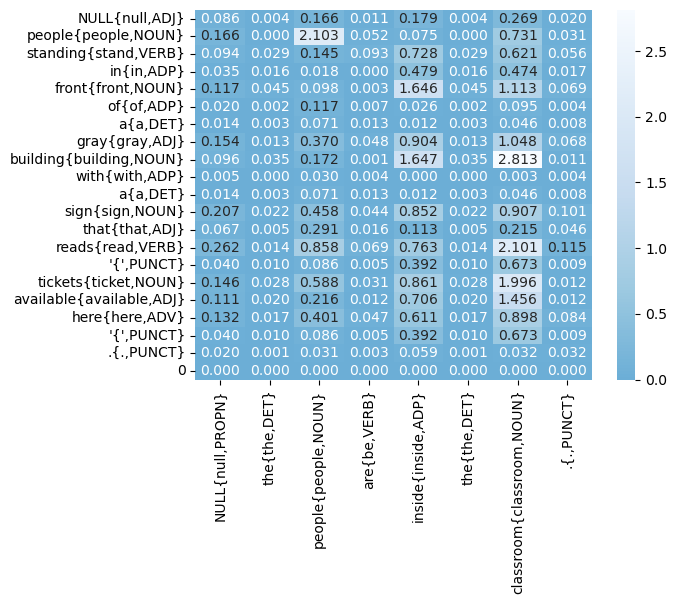

In [ ]:
sns.heatmap(p_df, center=0, cmap='Blues_r', annot=True, fmt='.3f')

<AxesSubplot:>

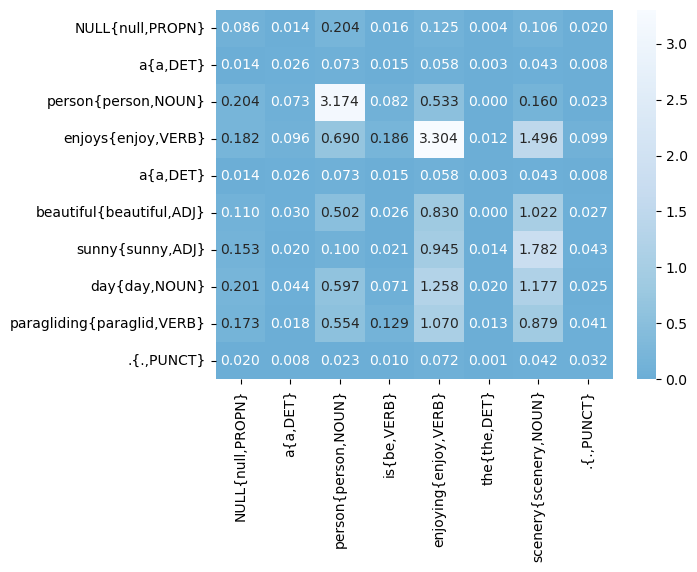

In [ ]:
sns.heatmap(p1_df, center=0, cmap='Blues_r', annot=True, fmt='.3f')

<AxesSubplot:>

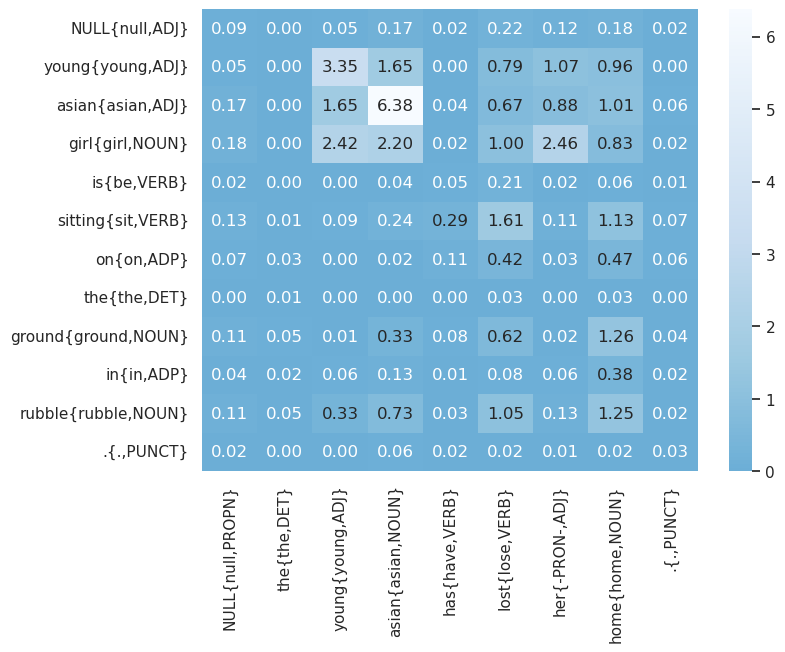

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(p2_df, center=0, cmap='Blues_r', annot=True, fmt='.2f')

<AxesSubplot:>

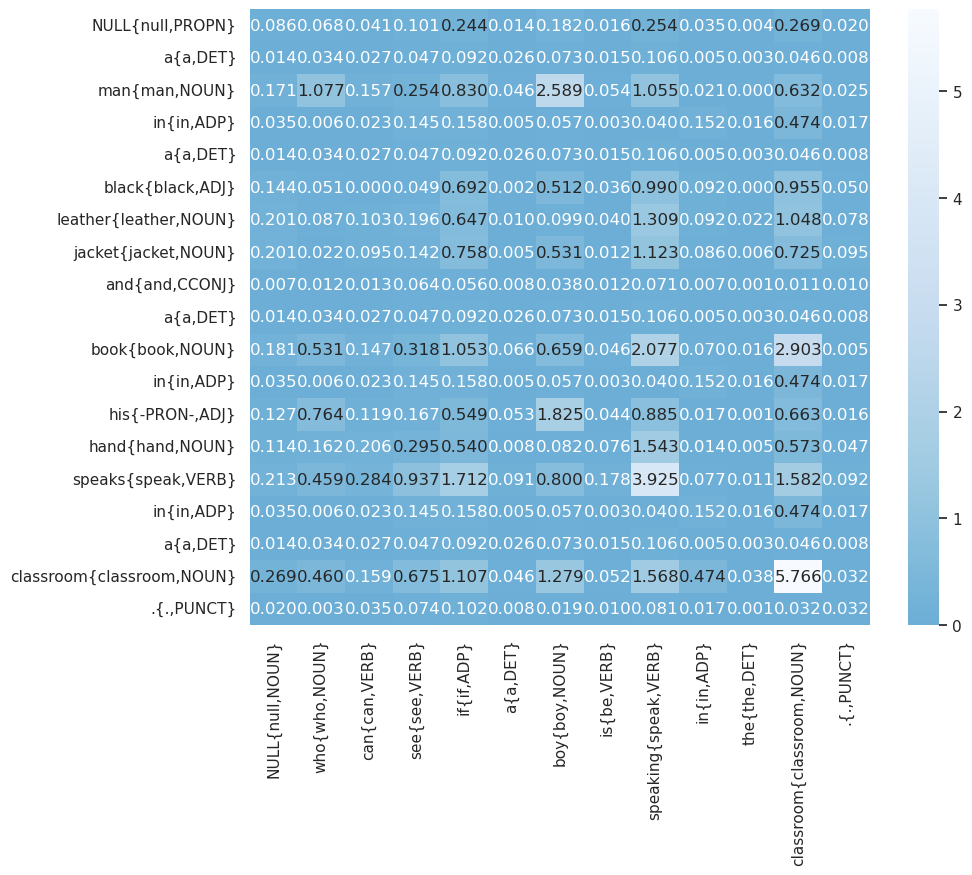

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(ppu_df, center=0, cmap='Blues_r', annot=True, fmt='.3f')